In [2]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [3]:
# Импорты для визуализации
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70% !important:}</style>"
HTML(style)

In [4]:
dogs_df = pd.read_csv('data/dogs.csv', index_col=0)
dogs_df

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик


In [5]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [6]:
X = dogs_df[['Гавкает', 'Лазает по деревьям', 'Шерстист']]
y = dogs_df.Вид

In [7]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

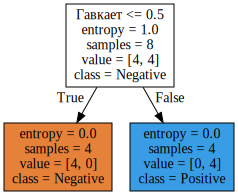

In [8]:
# Отрисуем что происходит внутри дерева решений
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [9]:
cats_df = pd.read_csv('data/cats.csv', index_col=0)
cats_df

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [11]:
X = cats_df[['Лазает по деревьям', 'Гавкает', 'Шерстист']]
y = cats_df.Вид
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

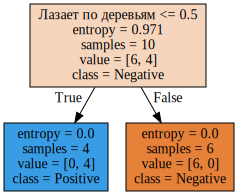

In [12]:
# Отрисуем что происходит внутри дерева решений
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [13]:
# def entropy(s: pd.Series, decision=0.5):
E_sh_sob=(1/1)*m.log2((1/1)) - 0
E_sh_kot=-(4/9)*m.log2((4/9)) - (5/9)*m.log2((5/9))
E_gav_sob=0 - (5/5)*m.log2((5/5))
E_gav_kot=-(4/5)*m.log2((4/5)) - (1/5)*m.log2((1/5))
E_laz_sob=0 - (6/6)*m.log2((6/6))
E_laz_kot=-(4/4)*m.log2((4/4)) - 0

In [14]:
print(E_sh_sob, E_sh_kot,E_gav_sob, E_gav_kot, E_laz_sob, E_laz_kot)

0.0 0.9910760598382222 0.0 0.7219280948873623 0.0 -0.0


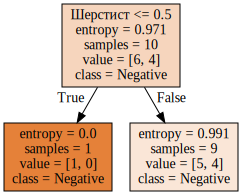

In [15]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
X = cats_df[['Шерстист']]
y = cats_df.Вид
clf.fit(X, y)
# Отрисуем что происходит внутри дерева решений
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

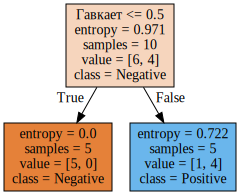

In [16]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
X = cats_df[['Гавкает']]
y = cats_df.Вид
clf.fit(X, y)
# Отрисуем что происходит внутри дерева решений
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

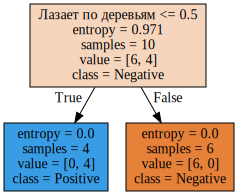

In [17]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
X = cats_df[['Лазает по деревьям']]
y = cats_df.Вид
clf.fit(X, y)
# Отрисуем что происходит внутри дерева решений
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

# Варианты решения других:

In [24]:
from scipy.stats import entropy


def ent(data):
    return entropy(data.Вид.value_counts() / len(data), base=2)


df = pd.read_csv('data/cats.csv', index_col=0)
print('Шерстист на 0: ', ent(df[df.Шерстист == 0]))
print('Шерстист на 1: ', ent(df[df.Шерстист == 1]))
print('Гавкает на 0: ', ent(df[df.Гавкает == 0]))
print('Гавкает на 1: ', ent(df[df.Гавкает == 1]))
print('Лазает по деревьям на 0: ', ent(df[df['Лазает по деревьям'] == 0]))
print('Лазает по деревьям на 1: ', ent(df[df['Лазает по деревьям'] == 1]))

Шерстист на 0:  0.0
Шерстист на 1:  0.9910760598382222
Гавкает на 0:  0.0
Гавкает на 1:  0.7219280948873623
Лазает по деревьям на 0:  0.0
Лазает по деревьям на 1:  0.0


In [37]:
def split(df, col):
    '''Разделяем датафрейм на 2 части, в первой значение col == 0, во второй col == 1 '''
    return df[df[col] == 0], df[df[col] == 1]

def entropy(df, ycol):
    ''' Энтропия значений столбца ycol(Вид) для одного датафрейма  '''
    p = df[ycol].value_counts() / df[ycol].size # Series с вероятностями каждого исхода
    return round(-np.sum(p * np.log2(p)), 2)    # Умножаем на лог2, складываем

cats = cats_df
ycol = 'Вид'

for col in cats.columns[:4]:
    t0, t1 = split(cats, col)
    print(col, entropy(t0, ycol), entropy(t1, ycol))

# Шерстист -0.0 0.99
# Гавкает -0.0 0.72
# Лазает по деревьям -0.0 -0.0

Шерстист -0.0 0.99
Гавкает -0.0 0.72
Лазает по деревьям -0.0 -0.0
Вид -0.0 -0.0


In [27]:
cats_df.Вид.value_counts()

котик      6
собачка    4
Name: Вид, dtype: int64

In [39]:
E_y = -(4/10)*m.log2(4/10) - (6/10)*m.log2(6/10)
print(E_y)

0.9709505944546686


In [1]:
E1 = E_y - 0.99

NameError: name 'E_y' is not defined

In [19]:
# Свои расчеты
E_y = -(4/10)*m.log2(4/10) - (6/10)*m.log2(6/10)
print(E_y)

0.9709505944546686


In [37]:
E_sh_0 = -(1/1)*m.log2(1/1) - (1/1)*m.log2(1/1)
E_sh = -(4/9)*m.log2(4/9) - (5/9)*m.log2(5/9)
E_g_zero = -(5/5)*m.log2(5/5) - (5/5)*m.log2(5/5)
E_g_one = -(4/5)*m.log2(4/5) - (1/5)*m.log2(1/5)
#E_d_zero = -(4/4)*m.log2(4/4) - 0*m.log2(0) # Ноль но лограрифм от нуля не берется
#E_d_one = -(6/6)*m.log2(6/6) - (0)*m.log2(0) # Ноль но лограрифм от нуля не берется
print(E_sh)
print(E_sh_0)
print(E_g_zero)
print(E_g_one)
#print(E_d_zero)
#print(E_d_one)

0.9910760598382222
-0.0
-0.0
0.7219280948873623


In [42]:
eg_sh = 0 + (9/10) * 0.99
eg_g = (5/10) * 0 + (5/10) * 0.72
eg_l = (4/10) * 0 + (6/10) * 0
print(eg_sh, eg_g, eg_l)

0.891 0.36 0.0


In [43]:
# ig
print(0.97 - 0.89, 0.97 - 0.36, 0.97 - 0.0)

0.07999999999999996 0.61 0.97


In [48]:
# Чужое решение
import pandas as pd
from scipy.stats import entropy


def ent(data):
    return entropy(data.Вид.value_counts() / len(data), base=2)


def ig(data, feature):
    ent0 = ent(data[data[feature] == 0])
    ent1 = ent(data[data[feature] == 1])
    n = len(data)
    n0 = len(data[data[feature] == 0])
    n1 = len(data[data[feature] == 1])
    return ent(data) - ent0 * n0 / n - ent1 * n1 / n


df = pd.read_csv('data/cats.csv', index_col=0)

# С моим исправлением
print('IG по шертистости: ', ig(df, 'Шерстист'))
print('IG по голосу: ', ig(df, 'Гавкает'))
print('IG по деревьям: ', ig(df, 'Лазает по деревьям'))

IG по шертистости:  0.07898214060026876
IG по голосу:  0.6099865470109876
IG по деревьям:  0.9709505944546688
